In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_flow(path, src_ip, dst_ip):
    data = pd.read_csv(path)
    raw_data = data.values

    clean_data = []
    flows = []

    # 패킷의 전송 간격을 구함
    interval = []
    last = 0
    for line in raw_data:
        if line[2] == src_ip and line[3] == dst_ip:
            interval.append(line[1]-last)
            last = line[1]
            clean_data.append(line)

    # 패킷 평균 전송 간격
    avg = sum(interval) / len(interval)

    diverge = []

    i = 0
    # 평균 전송간격보다 큰 경우 flow를 분리를 위한 인덱스 찾기
    for t in interval:
        if t >= avg:
            diverge.append(i)
        i = i + 1

    # 찾은 인덱스로 flow를 분리
    prefix = 0
    for idx in diverge:
        if idx >= len(clean_data):
            break
        flow = clean_data[prefix:idx]
        flows.append(flow)
        prefix = idx + 1

    if len(flows) < 100:
        return 0
    print("## 총 ", len(flows), "개의 flow 발견")

    # 평균 인터벌
    avg_ivl = []
    # 평균 페이로드 크기
    avg_pay = []
    # 평균 패킷 수
    avg_cnt = []
    # 프로토콜 넘뻐
    pcl = []

    for flow in flows:
        last = 0
        ivl = 0
        payload = 0
        if len(flow) <= 0:
            continue
        for line in flow:
            ivl = ivl + (line[1]-last)
            last = line[1]
            payload = payload + line[5]

        # 값 입력
        avg_ivl.append(ivl / len(flow))
        avg_pay.append(payload / len(flow))
        avg_cnt.append(len(flow))
        pcl.append(flow[0][4])

    return [avg_ivl, avg_cnt, avg_pay, pcl]


In [3]:
# for preprocessing only
def data_process(path):
    nm = path.split('/')[3]
    print(nm)
    data = pd.read_csv(path)
    src_set = set(data["ip.src"])
    
    rl = np.array([])
    
    for ips in src_set:
        if type(ips) == float:
            continue
        dst_set = set(data[data["ip.src"] == ips]["ip.dst"])
        for ipd in dst_set:
            tmp = get_flow(path, ips, ipd)
            if tmp != 0:
                tmp = np.array(tmp)
                if len(rl) == 0:
                    rl = tmp
                else:
                    rl = np.hstack((rl, tmp))
    rl = pd.DataFrame(rl.transpose(), columns=['ivl', 'cnt', 'pay', 'pcl'])
    print(rl)
    rl.to_csv("./processed/VPN/" + nm + "_processed.csv", index=False)

In [5]:
data_process("./Datasets/VPN/Chat/merge.csv")
data_process("./Datasets/VPN/Email/merge.csv")
data_process("./Datasets/VPN/FileTransfer/merge.csv")
data_process("./Datasets/VPN/P2P/merge.csv")
data_process("./Datasets/VPN/Streaming/merge.csv")
data_process("./Datasets/VPN/VoIP/merge.csv")

Chat
## 총  253 개의 flow 발견
## 총  620 개의 flow 발견
## 총  587 개의 flow 발견
## 총  295 개의 flow 발견
## 총  141 개의 flow 발견
## 총  249 개의 flow 발견
## 총  602 개의 flow 발견
## 총  149 개의 flow 발견
## 총  545 개의 flow 발견
## 총  149 개의 flow 발견
## 총  144 개의 flow 발견
## 총  227 개의 flow 발견
## 총  207 개의 flow 발견
## 총  181 개의 flow 발견
## 총  378 개의 flow 발견
## 총  165 개의 flow 발견
## 총  154 개의 flow 발견
## 총  307 개의 flow 발견
## 총  544 개의 flow 발견
## 총  693 개의 flow 발견
## 총  147 개의 flow 발견
## 총  136 개의 flow 발견
## 총  227 개의 flow 발견
## 총  210 개의 flow 발견
## 총  201 개의 flow 발견
## 총  208 개의 flow 발견
## 총  261 개의 flow 발견
## 총  206 개의 flow 발견
## 총  693 개의 flow 발견
## 총  141 개의 flow 발견
## 총  239 개의 flow 발견
## 총  618 개의 flow 발견
## 총  694 개의 flow 발견
## 총  158 개의 flow 발견
## 총  291 개의 flow 발견
## 총  275 개의 flow 발견
## 총  431 개의 flow 발견
## 총  520 개의 flow 발견
              ivl   cnt         pay  pcl
0        0.679753   3.0  296.000000  6.0
1        1.264271   7.0  422.285714  6.0
2        1.772125   6.0  352.500000  6.0
3        7.249125   2.0   74.5000

## 총  536 개의 flow 발견
## 총  3242 개의 flow 발견
## 총  864 개의 flow 발견
## 총  651 개의 flow 발견
## 총  2593 개의 flow 발견
## 총  4959 개의 flow 발견
## 총  2819 개의 flow 발견
## 총  409 개의 flow 발견
## 총  2480 개의 flow 발견
## 총  667 개의 flow 발견
## 총  296 개의 flow 발견
## 총  2117 개의 flow 발견
## 총  3833 개의 flow 발견
## 총  2274 개의 flow 발견
              ivl    cnt          pay  pcl
0       39.898876    3.0    60.000000  6.0
1        4.800066   25.0  1051.880000  6.0
2        7.060306   17.0  1360.000000  6.0
3      120.241121    1.0  1360.000000  6.0
4        2.933434   41.0  1360.000000  6.0
5        3.437011   35.0  1348.657143  6.0
6       40.168719    3.0  1360.000000  6.0
7        1.674216   72.0  1360.000000  6.0
8        1.698234   71.0  1360.000000  6.0
9       17.252983    7.0  1360.000000  6.0
10       0.520913  232.0  1357.073276  6.0
11       0.688268  176.0  1360.000000  6.0
12       3.677838   33.0  1360.000000  6.0
13       1.011856  120.0  1329.708333  6.0
14       5.060205   24.0  1360.000000  6.0
15      40

In [2]:
"""
# for origin data only
low_flow = get_flow("./30sec_server.csv", '10.0.0.1', '10.0.0.2')
high_flow = get_flow("./Datasets/nonVPN/Chat/merge.csv", '131.202.240.87', '10.0.0.2')
chat_flow = get_flow("./chat_server.csv", '10.0.0.1', '10.0.0.2')
"""
target_nm = 0
class_nm = ['Chat', 'Email', 'FileTransfer', 'P2P', 'Streaming', 'VoIP']
oposit_data = []
for i in range(len(class_nm)):
    if i == target_nm:
        target_data = pd.read_csv("./processed/" + class_nm[i] + "_processed.csv").values
        print(target_data)
    else:
        oposit_data.extend(pd.read_csv("./processed/" + class_nm[i] + "_processed.csv").values)
print(len(target_data))
#oposit_data = oposit_data[150000:300000]
print(len(oposit_data))

[[6.79753333e-01 3.00000000e+00 2.96000000e+02 6.00000000e+00]
 [1.26427100e+00 7.00000000e+00 4.22285714e+02 6.00000000e+00]
 [1.77212533e+00 6.00000000e+00 3.52500000e+02 6.00000000e+00]
 ...
 [9.35315704e+02 1.00000000e+00 5.20000000e+01 6.00000000e+00]
 [3.11924718e+02 3.00000000e+00 2.41333333e+02 6.00000000e+00]
 [9.37221794e+02 1.00000000e+00 5.20000000e+01 6.00000000e+00]]
10820
542185


In [150]:
print(target_data[:10000])
print(oposit_data[:10000])

[[5.92530000e-02 2.00000000e+00 1.66000000e+02 1.70000000e+01]
 [3.24848083e-01 1.20000000e+01 2.77083333e+02 1.70000000e+01]
 [6.06651100e+00 1.00000000e+00 1.36000000e+02 1.70000000e+01]
 ...
 [3.95056291e+02 2.00000000e+00 9.20000000e+01 1.70000000e+01]
 [3.99558293e+02 2.00000000e+00 9.20000000e+01 1.70000000e+01]
 [4.02057386e+02 2.00000000e+00 9.20000000e+01 1.70000000e+01]]
[array([  0.298518,   1.      , 131.      ,  17.      ]), array([  1.92357,   1.     , 131.     ,  17.     ]), array([ 2.463493,  2.      , 92.      , 17.      ]), array([ 4.707858,  2.      , 92.      , 17.      ]), array([ 6.44673,  2.     , 92.     , 17.     ]), array([ 3.8105146,  5.       , 92.       , 17.       ]), array([11.082762,  2.      , 92.      , 17.      ]), array([14.2131515,  2.       , 92.       , 17.       ]), array([18.3853925,  2.       , 92.       , 17.       ]), array([26.7038485,  2.       , 92.       , 17.       ]), array([ 7.15567137,  8.        , 92.        , 17.        ]), array([1

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = MinMaxScaler()
scaler.fit(target_data)
target_data = scaler.transform(target_data)

In [5]:
scaler.fit(oposit_data)
oposit_data = scaler.transform(oposit_data)

In [6]:
target_data = pd.DataFrame({'interval': target_data[:, 0], 'count': target_data[:, 1], 'size': target_data[:, 2], 'proto': target_data[:, 3], 'label': 0})
oposit_data = pd.DataFrame({'interval': oposit_data[:, 0], 'count': oposit_data[:, 1], 'size': oposit_data[:, 2], 'proto': oposit_data[:, 3], 'label': 1})

In [7]:
full_data = pd.concat([target_data, oposit_data])

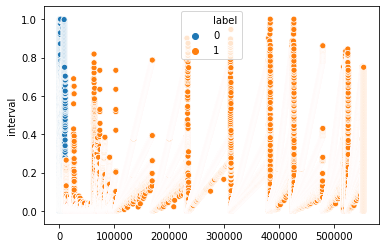

In [8]:
sns.scatterplot(x=range(len(full_data['interval'])), y=full_data['interval'], hue=full_data['label'])

In [9]:
from sklearn.cluster import KMeans, DBSCAN

In [10]:
X = full_data.drop(['label'], axis=1)
Y = full_data['label']

In [11]:
kmeans = KMeans(n_clusters=2).fit(X.values)
X['cid'] = kmeans.labels_

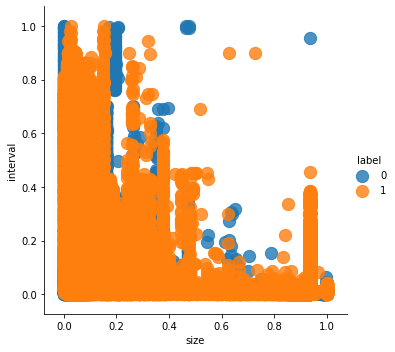

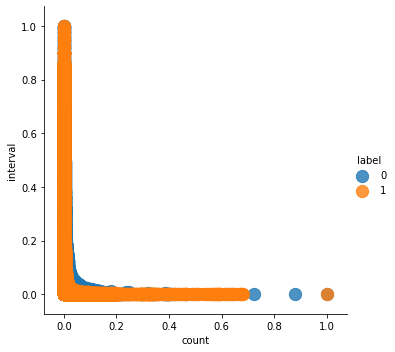

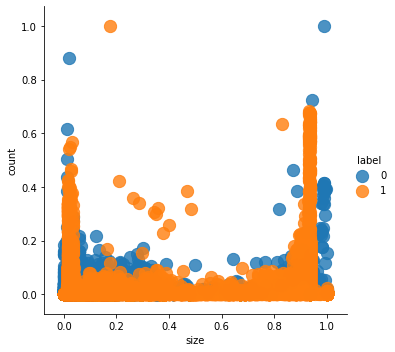

In [12]:
sns.lmplot('size', 'interval', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')
sns.lmplot('count', 'interval', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')
sns.lmplot('size', 'count', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')

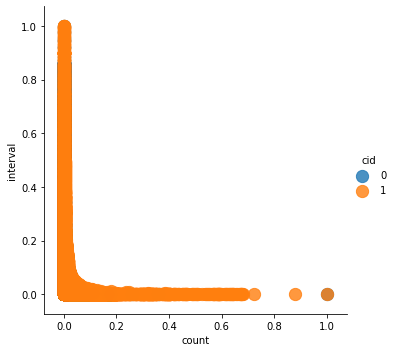

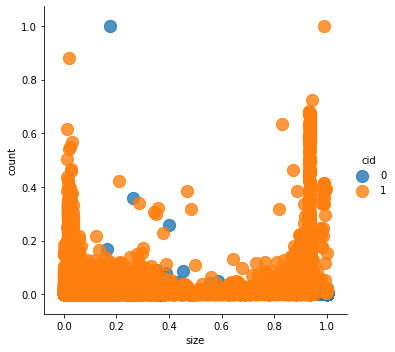

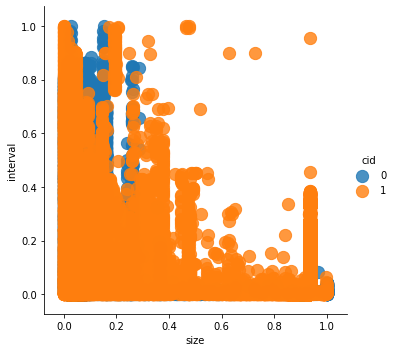

In [13]:
sns.lmplot('count', 'interval', data=X, fit_reg=False, scatter_kws={'s':150}, hue='cid')
sns.lmplot('size', 'count', data=X, fit_reg=False, scatter_kws={'s':150}, hue='cid')
sns.lmplot('size', 'interval', data=X, fit_reg=False, scatter_kws={'s':150}, hue='cid')

In [14]:
y_pred = list(kmeans.labels_)
scoreY = list(Y)
hit = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == scoreY[i]:
        hit = hit + 1
print(hit/len(scoreY))

0.18410321787325612


In [15]:
X = X.drop(['cid'], axis=1)

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=3000).fit(X)

In [ ]:
y_pred = dbscan.fit_predict(X)
X['cid'] = y_pred

In [ ]:
sns.lmplot('size', 'interval', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')
sns.lmplot('count', 'interval', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')
sns.lmplot('size', 'count', data=full_data, fit_reg=False, scatter_kws={'s':150}, hue='label')

In [ ]:
sns.lmplot('count', 'interval', data=X, fit_reg=False, scatter_kws={'s':50}, hue='cid')
sns.lmplot('size', 'count', data=X, fit_reg=False, scatter_kws={'s':50}, hue='cid')
sns.lmplot('size', 'interval', data=X, fit_reg=False, scatter_kws={'s':50}, hue='cid')

In [ ]:
hit = 0
for i in range(0, len(y_pred)):
    if (y_pred[i] + scoreY[i]) == 0:
        hit = hit + 1
print(hit/len(scoreY))

In [8]:
import tensorflow as tf
import time
from dagmm import DAGMM

In [9]:
full_data = pd.concat([target_data, oposit_data])
X = full_data.drop(['label'], axis=1)

In [13]:
tf.reset_default_graph()

In [14]:
model_dagmm = DAGMM(
    comp_hiddens=[16,8,1], comp_activation=tf.nn.tanh,
    est_hiddens=[8,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=200, minibatch_size=300
)

In [15]:
start = time.time()
model_dagmm.fit(X)
end = time.time()
print("Learning time = ", end-start)

 epoch 100/200 : loss = 0.654
 epoch 200/200 : loss = 0.456
Learning time =  688.3130090236664


In [16]:
full_data = pd.concat([target_data, oposit_data])
X = full_data.drop(['label'], axis=1)
Y = full_data['label']

In [17]:
energy = model_dagmm.predict(X)

Text(0, 0.5, 'Number of Sample(s)')

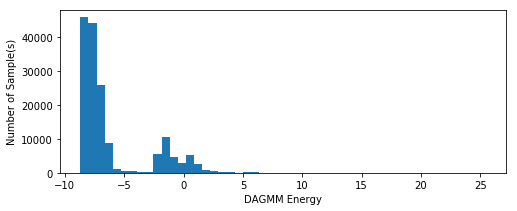

In [18]:
plt.figure(figsize=[8,3])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")

In [19]:
energy.sort()
threshold = len(energy)*0.9
print(threshold)
threshold = energy[-int(threshold)]
print(threshold)
cid = []
for node in energy:
    if node > threshold:
        cid.append(1)
    else:
        cid.append(0)

144738.0
-8.253516


In [20]:
X['cid'] = cid
X['energy'] = energy
X['label'] = Y

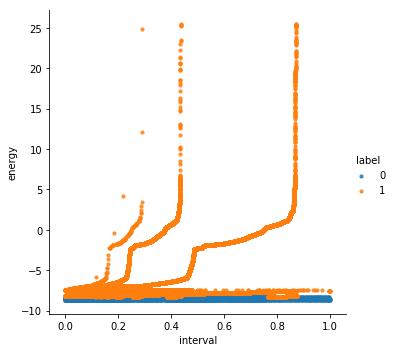

In [21]:
sns.lmplot('interval', 'energy', data=X, fit_reg=False, scatter_kws={'s':10}, hue='label')

In [25]:
y_pred = list(X['cid'])
scoreY = list(X['label'])
hit = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == scoreY[i] and scoreY[i] == 1:
        hit = hit + 1
print("PP", hit/len([x for x in scoreY if x == 1]))

hit = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == scoreY[i] and scoreY[i] == 0:
        hit = hit + 1
print("FF", hit/len([x for x in scoreY if x == 0]))

hit = 0
for i in range(0, len(y_pred)):
    if y_pred[i] != scoreY[i] and scoreY[i] == 1:
        hit = hit + 1
print("PF", hit/len([x for x in scoreY if x == 0]))

hit = 0
for i in range(0, len(y_pred)):
    if y_pred[i] != scoreY[i] and scoreY[i] == 0:
        hit = hit + 1
print("FP", hit/len([x for x in scoreY if x == 1]))

for i in range(0, len(y_pred)):
    if y_pred[i] == scoreY[i]:
        hit = hit + 1
print("Accuracy", hit/len(scoreY))

PP 0.9649133333333333
FF 1.0
PF 0.48641404805914973
FP 0.0
Accuracy 0.9672739708991419


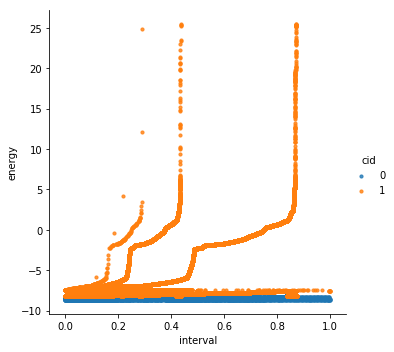

In [23]:
sns.lmplot('interval', 'energy', data=X, fit_reg=False, scatter_kws={'s':10}, hue='cid')